# Oppsett av config.json


### Forslag til oppsett på config.json til bruk i  andre undersøkelser. Under følger forklaring til de ulike elementene:


| Parameter    | Beskrivelse|
|:--------------|:-------------
|Undersøkelse | Navn på undersøkelsen|
|Brukernavn | brukernavnet ditt (initialer) |
|Perioder |Hvilke perioder skal tas inn i visualiseringen. Man kan ta inn 1 eller flere (skilles med komma). Spesifiser:<ul><li>Delreg </li><li>Periode (med unikt navn)</li></ul><ul>Eks: 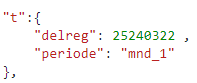 |
|Aggregater | Hvilke variabler skal det være mulig å aggregere på i skjermbildene (typisk group by) <ul> Eks: 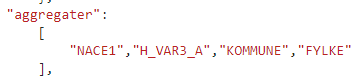 |
|Id_variabel | Koblingsnøkkel, typisk orgnr. OBS! Skal som regel skrives med store bokstaver |
|Navn_variabel | Forklaringsvariabel til koblingsnøkkel. Hentes fra SFU, skrives med store bokstaver|
|kombinert_id_navn | Navnet på variabelen som er slått sammen av id og navn |
|Nøkkeltall_enhetssiden | Viktige sum-variabler, som man typisk sjekker for alle enheter. Kan være en eller flere|
|Data | Filstien må vise til hvor man har tenkt å opprette sqlite-databasen. Dette kan være på et stammeområde eller på egen bruker.<ul> Bruk hele stien (/ssb/stammexx/... evt /ssb/bruker/initialer) |
|Tabeller | Tabeller man trenger i sqlite-databasen man oppretter. Kan legge til flere tabeller ved behov. Det er ikke nødvendig å endre noe her for at Edith skal fungere |
|Default_valg |Om man ønsker forhåndsvalgte variabler i skjermbildene kan denne fylles ut |


# Oppretting_database_raadata.ipynb

Denne notebooken kan benyttes for å opprette sqlite-database med tabell over raadata. Notebooken er tilrettelagt for å hente data fra DYNAREV.
Endringer som må gjøres:

*	Riktig passord må settes inn for oppkobling til Oracle/Dynarev (DB1P)


*   Det er mulig å ta med flere kjennemerker enn default fra SFU inn til rådatatabellen. Dette kan typisk være andre aggregater enn NACE.<ul>
    Eks - her hentes i tillegg hjelpevariabelen H_VAR3_A, kommunenummeret og det lages en utledning til fylke fra kommunenummeret:<ul> 
    f"SELECT NAVN, ORGNR, ORG_FORM, NACE1, NACE2, ENHETS_ID, ENHETS_TYPE<b>,H_VAR3_A,F_KOMMUNENR AS KOMMUNE, SUBSTR(F_KOMMUNENR,1,2) AS FYLKE</b> FROM dynarev.vw_enhet_i_delreg </ul></ul>

*   Notebook'en laster som default inn alle data fra aktuelle delregistrene (der aktiv=1). Om man bare vil hente inn for ett skjema kan man legge til denne seleksjonen selv (se eksempel i notebooken)

*	Om man ønsker et annet navn enn «edith» på sqlite-databasen kan dette endres i funksjonen connect() i models_delt.py:
def connect():
    engine = create_engine(f"sqlite:///{config['data']['filsti']}/<b>edith.sqlite</b>")
    conn = sqlite3.connect(f"{config['data']['filsti']}/<b>edith.sqlite</b>"
    

# Opprett_tabell_svarinngang.ipynb

Denne notebooken kan benyttes for å opprette tabell for svarinngang. Notebooken er tilrettelagt for å hente data fra DYNAREV.
Endringer som må gjøres:

*	Riktig passord må settes inn for oppkobling til Oracle/Dynarev (DB1P)

*   Notebook'en laster som default inn alle data fra aktuelle delregistrene (der aktiv=1). Om man bare vil hente inn for ett skjema kan man legge til denne seleksjonen selv (se eksempel i notebooken)